<a href="https://colab.research.google.com/github/Madhusudan2005/ElevateLabs-Task3/blob/main/ElevateLabs_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
df = pd.read_csv('Housing.csv')

# --- Preprocessing and Exploration ---

# See the first 5 rows of the data
print("Data Head:")
print(df.head())

# Get a summary of the dataset (data types, non-null values)
print("\nData Info:")
df.info()

# Check for any missing values in the columns
print("\nMissing Values:")
print(df.isnull().sum())

# Get descriptive statistics for the numerical columns
print("\nData Description:")
print(df.describe())

Data Head:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data

In [12]:

columns_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in columns_to_map:
    df[col] = df[col].map({'yes': 1, 'no': 0})

furnishing_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True, dtype=int)

# Add these new columns to the dataframe
df = pd.concat([df, furnishing_dummies], axis=1)

# Drop the original 'furnishingstatus' column as it's no longer needed
df.drop('furnishingstatus', axis=1, inplace=True)


# Now, display the first few rows to confirm the changes
print("\nData Head after converting text to numbers:")
print(df.head())


Data Head after converting text to numbers:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2             

In [13]:

print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')


In [14]:
# Select features (X) and target (y)
# For this example, we'll use a few common features.
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'parking']
X = df[features]
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)


Shape of training data (X_train): (436, 6)
Shape of testing data (X_test): (109, 6)


In [15]:
# Create a Linear Regression model object
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("\nLinear Regression model trained successfully!")


Linear Regression model trained successfully!


In [16]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1126434.3001296564
Mean Squared Error (MSE): 2247326082256.0547
R-squared (R²): 0.5553873083721483


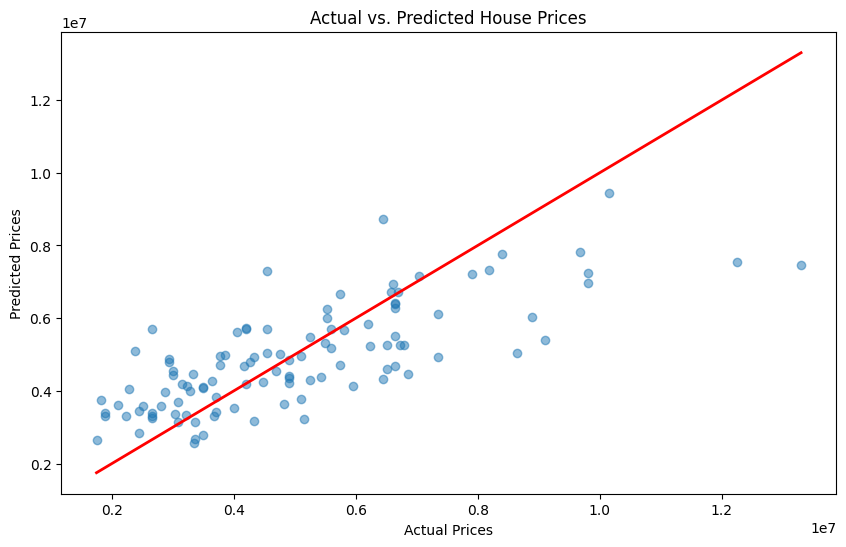


Model Coefficients:
            Coefficient
area       2.818398e+02
bedrooms   1.813524e+05
bathrooms  1.202233e+06
stories    4.566527e+05
mainroad   6.500265e+05
parking    3.054430e+05

Model Intercept: -385643.11363392137


In [17]:
# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
# Plotting the 'perfect prediction' line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

# --- Interpret the Coefficients ---
# The coefficients tell us how a one-unit change in a feature affects the predicted price.
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)

print(f"\nModel Intercept: {model.intercept_}")